# **Task 4: Predicting House Prices**
## Author: Muhammad Tayyab Iqbal
## Email: thetayyabiqbal@gmail.com
### Date: Jan 27, 2025

## **Step 1:** Importing related libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression

## **Step 2:** Import the Dataset

In [14]:
df = pd.read_csv('BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## **Step 3:** Rename the Columns

In [15]:
df.rename(columns={'crim': 'crime_rate', 'zn': 'res_land_zone',
                   'indus': 'industrial_acres', 'chas': 'charles_river',
                   'nox': 'nitrogen_oxides', 'rm': 'average_rooms',
                   'age': 'property_age', 'dis': 'distance_to_employment',
                   'rad': 'highway_accessibilty', 'tax': 'property_tax',
                   'ptratio': 'pupil_teacher_ratio', 'b': 'Black_population',
                   'lstat': 'lower_status_population', 'medv': 'median_home_value'}, inplace=True)
df.head()

,crime_rate,res_land_zone,industrial_acres,charles_river,nitrogen_oxides,average_rooms,property_age,distance_to_employment,highway_accessibilty,property_tax,pupil_teacher_ratio,Black_population,lower_status_population,median_home_value
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## **Step 4:** Check Dataset Information

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   crime_rate               506 non-null    float64
 1   res_land_zone            506 non-null    float64
 2   industrial_acres         506 non-null    float64
 3   charles_river            506 non-null    int64  
 4   nitrogen_oxides          506 non-null    float64
 5   average_rooms            506 non-null    float64
 6   property_age             506 non-null    float64
 7   distance_to_employment   506 non-null    float64
 8   highway_accessibilty     506 non-null    int64  
 9   property_tax             506 non-null    int64  
 10  pupil_teacher_ratio      506 non-null    float64
 11  Black_population         506 non-null    float64
 12  lower_status_population  506 non-null    float64
 13  median_home_value        506 non-null    float64
dtypes: float64(11), int64(3)
m

## **Step 5:** Check missing/null values

In [17]:
df.isnull().sum()

,0
crime_rate,0
res_land_zone,0
industrial_acres,0
charles_river,0
nitrogen_oxides,0
average_rooms,0
property_age,0
distance_to_employment,0
highway_accessibilty,0
property_tax,0


## **Step 6:** Check duplicated values

In [18]:
df.duplicated().sum()

0

## **Step 7:** Check statistical summary

In [19]:
df.describe()

,crime_rate,res_land_zone,industrial_acres,charles_river,nitrogen_oxides,average_rooms,property_age,distance_to_employment,highway_accessibilty,property_tax,pupil_teacher_ratio,Black_population,lower_status_population,median_home_value
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## **Step 8:** Split the data

In [20]:
X = df.drop('median_home_value', axis=1)
y = df['median_home_value']
print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

Shape of X =  (506, 13)
Shape of y =  (506,)


## **Step 9:** Scale the data using StandardScaler

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## **Step 10:** Train the Data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size=0.2,
                                                    random_state= 42)

## **Step 11:** Train the Model

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## **Step 12:** Predicting the Model

In [24]:
y_pred = model.predict(X_test)

## **Step 13:** Compare the models using Scatter plot

Text(0, 0.5, 'Predicted')

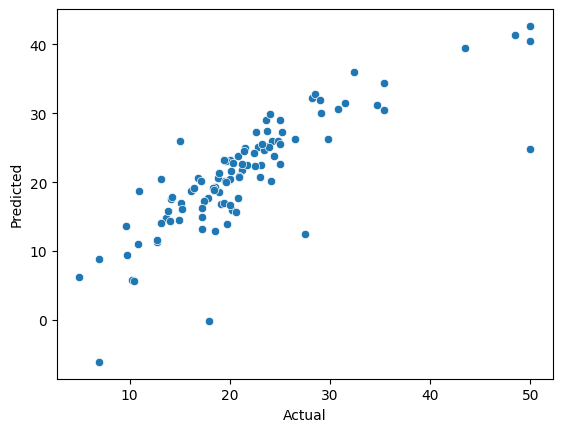

In [25]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

## **Step 13:** Check the Model score

In [27]:
model.score(X_train, y_train)

0.7508856358979672

## **Step 14:** Checking Errors

In [32]:
RMSE = root_mean_squared_error(y_test, y_pred)
print('Root_mean_squared_error = ', RMSE)

Root_mean_squared_error =  4.928602182665336
